<a href="https://colab.research.google.com/github/gonzalesricardo/PARADIGMAS-DE-LINGUAGEM-DE-PROGRAMA-O/blob/main/RNG_Gapminder_WID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

*Rogério de Oliveira* 

<br>
<br>

---


Este é um material de apoio para Atividade de Aprofundamento 2. Ele mostra como obter e tratar dados do [Gapminder](https://www.gapminder.org/) e do [WID](https://wid.world/). Você pode empregar uma ou ambas as fontes de dados. 

# Gapminder

![imagem](https://www.gapminder.org/wp-content/themes/gapminder2/images/gapminder-logo.svg)

Essa é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.

Acesse [aqui](https://www.gapminder.org/data/) para extrair os dados. 

Escolha os dados de seu interesse. Faça o download no formato `.csv` para o local que desejar.

In [168]:
import pandas as pd

renda_per_capita = pd.read_csv('/content/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')


# Preparação dos Dados

Vamos obter aqui dados de escolaridade e emissões de co2 do Brasil. O Gapminder fornece esses dados em conjuntos separados e vamos combinar esses dados para nossa análise.

In [179]:
renda_per_capita_Angola = renda_per_capita[ renda_per_capita.country == 'Angola']
renda_per_capita_Angola.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
1,Angola,691,693,697,700,702,705,709,712,716,718,721,724,728,731,735,738,740,743,747,750,754,754,755,756,756,757,757,758,758,759,759,761,761,762,762,762,763,763,764,...,7680,8040,8140,8240,8040,7570,7310,6930,6670,6220,6060,6020,6050,6090,6150,6190,6240,6300,6370,6460,6560,6680,6810,6950,7090,7240,7400,7550,7710,7880,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720


In [181]:
renda_per_capita_Angola = pd.melt(renda_per_capita_Angola, id_vars=['country']) 
renda_per_capita_Angola.head()

,country,variable,value
0,Angola,1799,691
1,Angola,1800,693
2,Angola,1801,697
3,Angola,1802,700
4,Angola,1803,702


In [199]:
Renda_Angola = renda_per_capita_Angola.rename(columns={'variable':'ano','value':'renda'})
Renda_Angolano = Renda_Angola [Renda_Angola.ano > '1970']
Renda_Angolano.head(100)

,country,ano,renda
172,Angola,1971,3140
173,Angola,1972,3280
174,Angola,1973,3140
175,Angola,1974,1970
176,Angola,1975,1750
...,...,...,...
246,Angola,2045,8940
247,Angola,2046,9120
248,Angola,2047,9320
249,Angola,2048,9520


In [172]:
expectativa_de_vida = pd.read_csv('/content/life_expectancy_years.csv')
expectativa_de_vida_Angola = expectativa_de_vida[ expectativa_de_vida.country == 'Angola' ]
expectativa_de_vida_Angola

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8,76.9,77.0,77.2,77.3,77.4,77.5,77.7,77.8,77.9,78.0,78.2,78.3,78.4,78.6,78.7,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0


In [200]:
Exp_Angola = pd.melt(expectativa_de_vida_Angola, id_vars=['country'])
Exp_Angola = Exp_Angola.rename(columns={'variable':'ano','value':'idade'})
Exp_Angolano = Exp_Angola [Exp_Angola.ano > '1970']
Exp_Angolano.head()

,country,ano,idade
172,Angola,1971,47.0
173,Angola,1972,47.2
174,Angola,1973,47.4
175,Angola,1974,47.5
176,Angola,1975,47.5


In [201]:
Angola = pd.merge(Renda_Angolano,Exp_Angolano,on=['country','ano'])
Angola.head(250)

,country,ano,renda,idade
0,Angola,1971,3140,47.0
1,Angola,1972,3280,47.2
2,Angola,1973,3140,47.4
3,Angola,1974,1970,47.5
4,Angola,1975,1750,47.5
...,...,...,...,...
74,Angola,2045,8940,72.4
75,Angola,2046,9120,72.5
76,Angola,2047,9320,72.7
77,Angola,2048,9520,72.9


# Visualização e Análise dos Dados

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


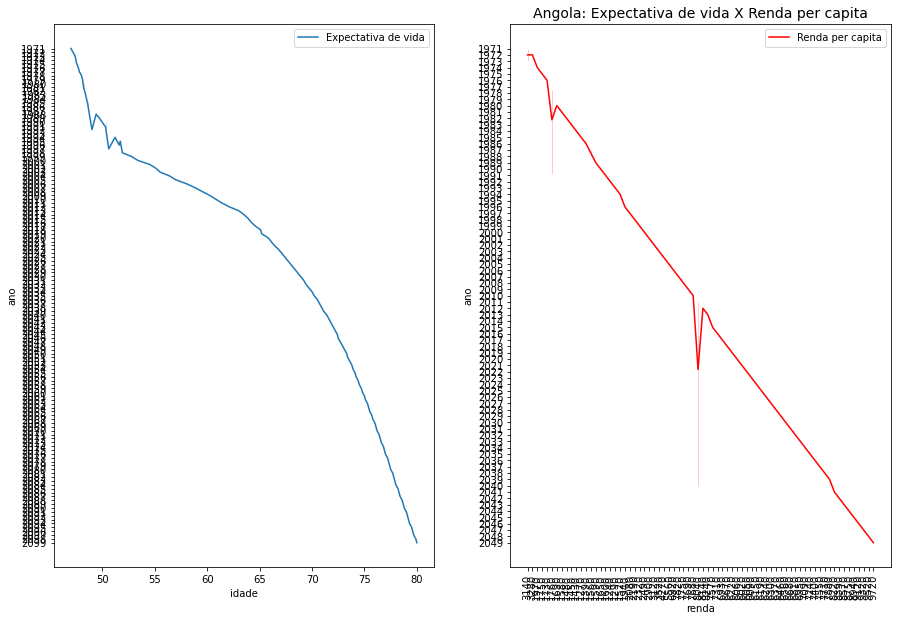

In [203]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.lineplot(x=Exp_Angolano.idade, y=Exp_Angolano.ano, label='Expectativa de vida')
plt.subplot(1,2,2)
sns.lineplot(x=Renda_Angolano.renda, y= Renda_Angolano.ano, label='Renda per capita', c='red')

plt.title('Angola: Expectativa de vida X Renda per capita', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [177]:
import numpy as np 
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=np.log( BR.school ), label='school')
sns.lineplot(x=BR.year, y=np.log( BR.co2 ), label='co2')

plt.title('Brasil: Escolaridade X Emissões CO2 (Log Scale)', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

AttributeError: ignored

<Figure size 864x432 with 0 Axes>

# World Inequality Database

![imagem](https://www.hup.harvard.edu/images/jackets/9780674979857.jpg)

Vamos ver como combinar dados de outras fontes? 

O World Inequality Database é uma base de dados aberta que mantem informações sobre desigualdade e concentração de renda no mundo. Esses dados são a base do livro **Capital in the Twenty-First Century** de *Thomas Piketty*.

In [ ]:
from IPython.display import IFrame
IFrame('https://wid.world/data/', width='1000', height=400)

Se você for empregar essa base escolha os índices de interesse, a estrutura da tabela e dê preferência para o formato `.xlsx` para download.

# Preparação dos Dados

Vamos selecionar dados do Brasil de 2000-2019 sobre a renda per capta (gpd) e o percentual da renda concentrado nos 10% mais ricos da população (percentil 10), e combinar esses dados com as informações que já coletamos do gapminder.

In [ ]:
gpd_BR = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/WID_Data_13092021-135730.xlsx',header=None)
gpd_BR


In [ ]:
gpd_BR.columns = ['country', 'ind_description',  'ind_code', 'year', 'value']
gpd_BR.year = gpd_BR.year.astype(str)
display(gpd_BR)
display(gpd_BR.dtypes)
        

In [ ]:
gpd_BR_all = gpd_BR[ gpd_BR.ind_code == 'pall' ][['country', 'year', 'value']]
gpd_BR_perc = gpd_BR[ gpd_BR.ind_code == 'p90p100' ][['country', 'year', 'value']]

display(gpd_BR_all)
display(gpd_BR_perc)

In [ ]:
BR = pd.merge(BR,gpd_BR_all,on=['country','year'])
BR = BR.rename(columns={'value':'gpd'})
BR.head()

In [ ]:
BR = pd.merge(BR,gpd_BR_perc,on=['country','year'])
BR = BR.rename(columns={'value':'gpd_perc10'})
BR.head()

# Visualização e Análise dos Dados

Como queremos comparar dados em escalas muito diferentes uma sugestão é empregarmos dados normalizados.

In [ ]:
for c in BR[['school','co2','gpd','gpd_perc10']]:
  BR[c] = BR[c] / BR[c].max()
BR.head()

In [ ]:
plt.figure(figsize=(12,6))

for c in BR[['school','co2','gpd','gpd_perc10']]:
  sns.lineplot(x=BR.year, y=BR[c], label=c)

plt.title('Brasil, Escolaridade x CO2 X Renda X Concentração', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Conclusões

Às análises devem ser finalizadas com uma conclusão, em geral um texto escrito e que inclui os resultados, limitações da análise e sugestões de próximos passos.

> *Os dados acima mostram que a escolaridade, renda e concentração de renda vem crescendo no Brasil de modo bastante correlacionado nas últimas décadas, havendo entretanto um maior aumento de emissões nos últimos anos.*